In [1]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

### 清理原始資料

In [2]:
# file = 'data/空氣品質監測月值_雲嘉南.csv'
# df = pd.read_csv(file)

# #取出測站資訊與風速，溫度，濕度
# attr = ['縣市', '監測月份', '測站', '細懸浮微粒PM 2.5 (μg/m 3 )', '風速WIND_SPEED(m/sec)', '溫度AMB_TEMP(℃)', '相對濕度RH(percent)']
# df = df[attr]

# # 去除含無效值的row
# df = df.replace(to_replace = '-',value=float("nan"))
# df = df.dropna()

# # 字串轉浮點數
# df.iloc[:,3:7] = df.iloc[:,3:7].astype(float) 

# df.to_csv(file,encoding='utf-8-sig',index=False)

### 讀取資料集

In [3]:
file = 'data/空氣品質監測月值_中部.csv'
df = pd.read_csv(file)
df_col= ['City', 'Date', 'Place', 'PM2.5','Wind Speed', 'Temperature', 'Relative humidity']
df.columns = df_col
df.head()

,City,Date,Place,PM2.5,Wind Speed,Temperature,Relative humidity
0,臺中市,2019/09,西屯,15.0,2.67,27.98,72.73
1,臺中市,2019/09,忠明,17.0,1.96,29.32,73.36
2,臺中市,2019/09,豐原,17.0,2.02,26.64,75.97
3,臺中市,2019/09,沙鹿,16.0,3.47,27.88,76.87
4,臺中市,2019/09,大里,16.0,1.94,28.40,67.37


In [4]:
# 計算出年平均
avg = df.groupby('Place',sort=False).mean()

#計算夏季(6-8月)與冬季(12-2月)平均
winter = ['2018/12', '2019/01', '2019/02']
summer = ['2019/06', '2019/07', '2019/08']

winter = df[df['Date'].isin(winter)].groupby('Place',sort=False).mean()
summer = df[df['Date'].isin(summer)].groupby('Place',sort=False).mean()

avg

,PM2.5,Wind Speed,Temperature,Relative humidity
Place,,,,
西屯,19.000000,2.519167,24.135000,75.415000
忠明,19.166667,1.870833,24.834167,72.089167
豐原,18.083333,2.135833,23.153333,75.242500
沙鹿,15.083333,3.417500,24.370833,75.840000
大里,15.416667,1.739167,24.997500,72.115833
彰化,19.083333,2.066667,24.302500,72.121667
線西,18.666667,3.787500,24.312500,78.507500
二林,20.333333,2.941667,24.409167,81.281667
南投,20.250000,1.565833,24.847500,73.694167


In [5]:
# City = []
# for p in avg.index:
#     if df['Place'] == p:
#         City.append(tuple(p,))
df

,City,Date,Place,PM2.5,Wind Speed,Temperature,Relative humidity
0,臺中市,2019/09,西屯,15.0,2.67,27.98,72.73
1,臺中市,2019/09,忠明,17.0,1.96,29.32,73.36
2,臺中市,2019/09,豐原,17.0,2.02,26.64,75.97
3,臺中市,2019/09,沙鹿,16.0,3.47,27.88,76.87
4,臺中市,2019/09,大里,16.0,1.94,28.40,67.37
...,...,...,...,...,...,...,...
127,南投縣,2018/11,埔里,22.0,1.22,22.23,78.27
128,南投縣,2018/11,竹山,34.0,1.32,23.09,80.51
129,南投縣,2018/10,南投,25.0,1.57,25.14,69.02
130,南投縣,2018/10,埔里,23.0,1.50,23.88,80.59


### 依年平均值分群

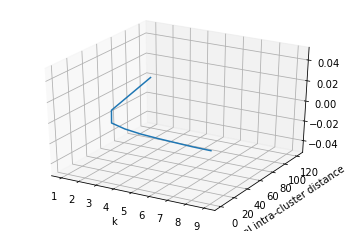

In [6]:
# 年平均值
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X1 = avg.iloc[:,1:]
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X1)
    scores.append(-model.score(X1))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

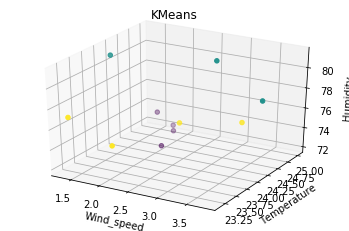

In [7]:
y_pred = KMeans(n_clusters=3).fit_predict(X1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], X1.iloc[:, 2], c=y_pred)
plt.title("KMeans");
ax.set_zlabel('Humidity')
ax.set_xlabel('Wind_speed')
ax.set_ylabel('Temperature')

 
plt.show()
avg['Group'] = y_pred

In [8]:
avg.sort_values(by='Group')

,PM2.5,Wind Speed,Temperature,Relative humidity,Group
Place,,,,,
忠明,19.166667,1.870833,24.834167,72.089167,0
大里,15.416667,1.739167,24.997500,72.115833,0
彰化,19.083333,2.066667,24.302500,72.121667,0
南投,20.250000,1.565833,24.847500,73.694167,0
線西,18.666667,3.787500,24.312500,78.507500,1
二林,20.333333,2.941667,24.409167,81.281667,1
竹山,23.833333,1.330000,24.128333,80.895000,1
西屯,19.000000,2.519167,24.135000,75.415000,2
豐原,18.083333,2.135833,23.153333,75.242500,2


### 依冬季、夏季分群

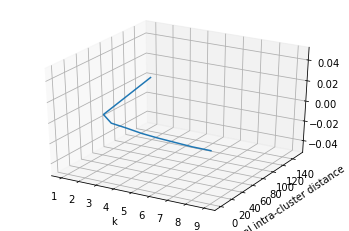

In [9]:
# 冬季
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X2= winter.iloc[:,1:]
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X2)
    scores.append(-model.score(X2))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

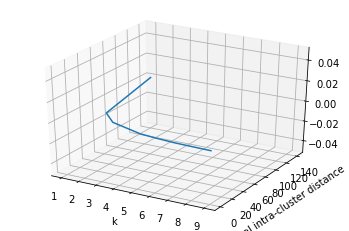

In [10]:
# 夏季
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X3 = summer.iloc[:,1:]
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X3)
    scores.append(-model.score(X3))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

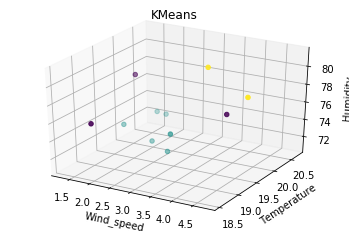

In [11]:
# 冬季
y_pred = KMeans(n_clusters=3).fit_predict(X2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2.iloc[:, 0], X2.iloc[:, 1], X2.iloc[:, 2], c=y_pred)
plt.title("KMeans");
ax.set_zlabel('Humidity')
ax.set_xlabel('Wind_speed')
ax.set_ylabel('Temperature')

 
plt.show()
winter['Group'] = y_pred

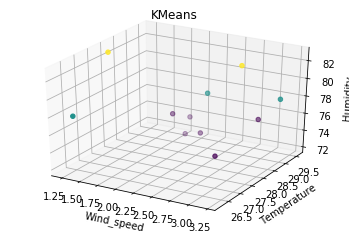

In [12]:
# 夏季
y_pred = KMeans(n_clusters=3).fit_predict(X3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3.iloc[:, 0], X3.iloc[:, 1], X3.iloc[:, 2], c=y_pred)
plt.title("KMeans");
ax.set_zlabel('Humidity')
ax.set_xlabel('Wind_speed')
ax.set_ylabel('Temperature')

 
plt.show()
summer['Group'] = y_pred

### 列出夏/冬季分群結果

In [13]:
summer.sort_values(by='Group')

,PM2.5,Wind Speed,Temperature,Relative humidity,Group
Place,,,,,
忠明,14.000000,1.813333,29.556667,73.546667,0
豐原,14.333333,2.720000,27.873333,73.103333,0
沙鹿,7.000000,2.866667,29.273333,75.343333,0
大里,11.000000,1.856667,29.220000,72.113333,0
彰化,12.000000,2.123333,29.073333,72.876667,0
南投,10.333333,1.783333,28.900000,74.916667,0
西屯,12.000000,2.263333,28.936667,78.003333,1
線西,10.666667,3.203333,29.106667,78.463333,1
埔里,11.666667,1.353333,26.190000,78.240000,1


In [14]:
winter.sort_values(by='Group')

,PM2.5,Wind Speed,Temperature,Relative humidity,Group
Place,,,,,
豐原,18.333333,1.936667,18.540000,76.473333,0
沙鹿,19.000000,4.183333,19.593333,76.886667,0
竹山,30.000000,1.470000,20.110000,77.876667,0
西屯,21.000000,2.953333,19.463333,73.906667,1
忠明,21.333333,1.993333,19.983333,70.896667,1
大里,16.666667,1.690000,20.683333,72.090000,1
彰化,22.000000,2.623333,19.733333,70.886667,1
南投,23.666667,1.473333,20.666667,72.263333,1
埔里,22.000000,1.296667,19.960000,72.306667,1


### 標出測站位置

In [15]:
p = pd.read_csv('data/空氣品質監測站.csv',index_col=3).iloc[:,[6,5]]

color = ['red','green','blue']

In [16]:
def show_map(data):
    fmap = folium.Map(location=p.loc[data.index[0]], zoom_start=10)
    for i in data.index:
        folium.Circle(location=p.loc[i],
                      popup=i,color=color[data.loc[i]['Group'].astype(int)],
                      radius=750,fill=True,
                      fill_opacity=1).add_to(fmap)
    return fmap

In [17]:
# 年平均
show_map(avg)

In [18]:
# 夏季
show_map(summer)

In [19]:
# 冬季
show_map(winter)